# Visualização de Dados

### Titanic

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic/train.csv')

In [2]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
data.columns = ['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 
                'IrmaosConjuge','PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']

In [4]:
data['Sexo'].replace({'male': 'homem', 'female': 'mulher'}, inplace=True)

C:\Users\caiod\AppData\Local\Temp\ipykernel_18400\1501177904.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sexo'].replace({'male': 'homem', 'female': 'mulher'}, inplace=True)


In [5]:
data['Cabine'] = data['Cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

### Matplotlib

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [7]:
data['Idade'].isnull().sum()

np.int64(177)

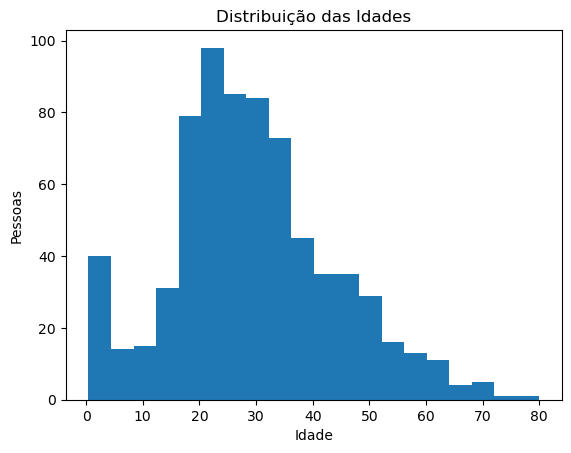

In [8]:
plt.hist(data['Idade'].dropna(), bins=20)
plt.title('Distribuição das Idades')
plt.ylabel('Pessoas')
plt.xlabel('Idade')
plt.show()

In [9]:
data['Classe'].unique()

array([3, 1, 2])

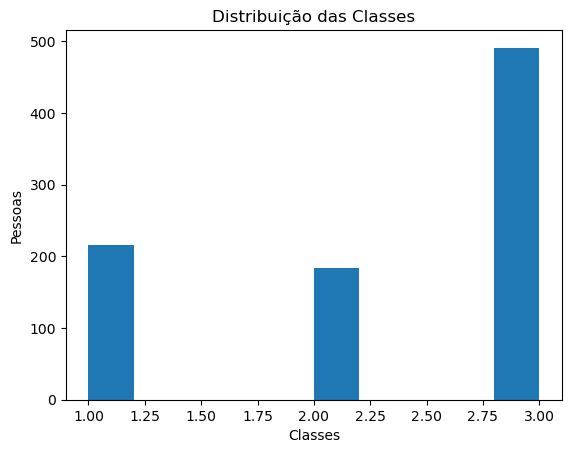

In [10]:
plt.hist(data['Classe'])
plt.title('Distribuição das Classes')
plt.ylabel('Pessoas')
plt.xlabel('Classes')
plt.show()

### Subplots - 1ª Forma

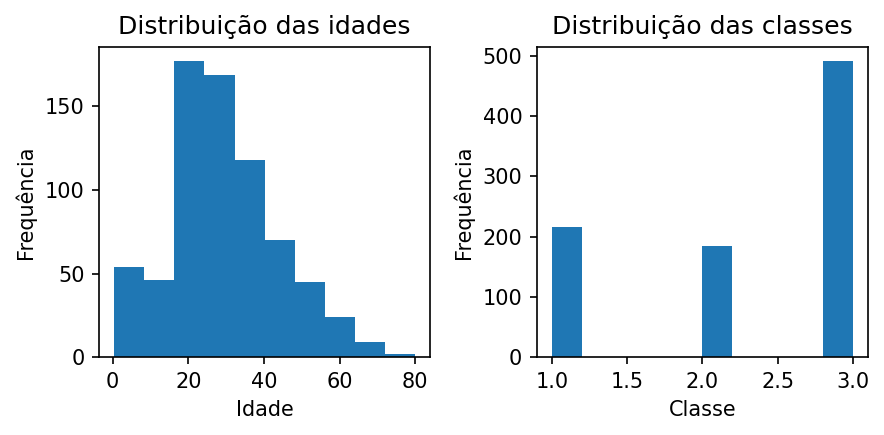

In [11]:
f, ax = plt.subplots(1, 2, figsize=(6, 3), dpi=150)

# Primeiro histograma
ax[0].hist(data['Idade'].dropna())
ax[0].set_title('Distribuição das idades')
ax[0].set_xlabel('Idade')       # label do eixo x
ax[0].set_ylabel('Frequência')  # label do eixo y

# Segundo histograma
ax[1].hist(data['Classe'].dropna())
ax[1].set_title('Distribuição das classes')
ax[1].set_xlabel('Classe')
ax[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


### Subplots - 2ª Forma

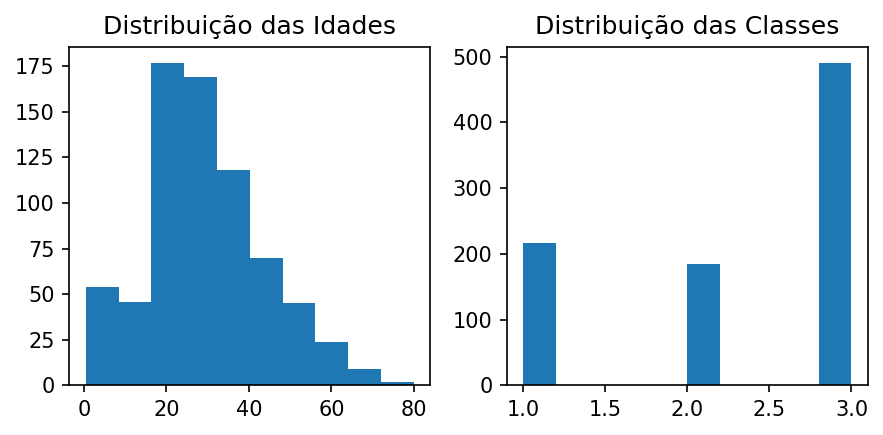

In [12]:
f, ax = plt.subplots(1,2, figsize=(6,3), dpi=150) # 1 linha, 2 colunas
ax[0].hist(data['Idade'].dropna())
ax[0].set_title('Distribuição das Idades')

ax[1].hist(data['Classe'])
ax[1].set_title('Distribuição das Classes')

plt.tight_layout()
plt.show()

### Seaborn

In [13]:
import seaborn as sns

In [14]:
data['Sobreviveu'].value_counts()

Sobreviveu
0    549
1    342
Name: count, dtype: int64

In [15]:
data['Sexo'].value_counts()

Sexo
homem     577
mulher    314
Name: count, dtype: int64

In [16]:
data['Classe'].value_counts()

Classe
3    491
1    216
2    184
Name: count, dtype: int64

### pie e countplot

In [17]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data['Classe'].value_counts().plot.pie(ax=ax[0], explode=[0.02,0.02,0.02], autopct='%0.2f%%')
ax[0].set_ylabel('')

sns.countplot('Sobreviveu', data=data, ax=ax[1])
ax[1].set_ylabel('')


TypeError: countplot() got multiple values for argument 'data'

### countplot  e hue

In [ ]:
sns.countplot('Sexo', hue='Sobreviveu', data=data)

### boxplot

In [18]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='Classe',y='Idade', hue='Sexo', data=data)

<Axes: xlabel='Classe', ylabel='Idade'>

### violinplot

In [ ]:
plt.figure(figsize=(5,3), dpi=100)
sns.violinplot(x='Classe',y='Idade', hue='Sexo', data=data)

### FacetGrid com hist

In [ ]:
g = sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

### FacetGrid com barplot

In [ ]:
g = sns.FacetGrid(data, row='Embarque', col='Sobreviveu')
g.map(sns.barplot, 'Sexo', 'Tarifa', alpha=0.8, ci=None)

fig=plt.gcf()
fig.set_size_inches(10,6)

### FacetGrid com distplot

In [ ]:
g = sns.FacetGrid(data, col='Sobreviveu', row='Classe', height=1.8, aspect=2.5)
g.map(sns.distplot, 'Idade', bins=20)

### catplot do tipo "point"

In [ ]:
sns.catplot('Embarque', 'Sobreviveu', data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)

In [ ]:
data['Embarque'].value_counts()

### FacetGrid com pointplot

In [ ]:
g = sns.FacetGrid(data, row='Embarque', height=1.8, aspect=2.2)
g.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo')
g.add_legend()

### heatmap

In [ ]:
data.isnull().sum()

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')

### relplot

In [ ]:
sns.relplot(x='Tarifa', y='Idade', hue='Sexo', data=data, size='Tarifa', sizes=(40,400),
           alpha=0.8, palette='magma')
plt.show()

### scatterplot

In [ ]:
sns.scatterplot(x='Idade', y='Tarifa', hue='Embarque', size='Idade',
               palette='magma', data=data, sizes=(10, 200))

### pairplot

In [ ]:
sns.pairplot(data[['Tarifa', 'Idade', 'Classe', 'Sexo', 'Embarque','Sobreviveu']], hue='Classe')

### jointplot tipo "kde"

In [ ]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='kde', color='g')

### jointplot tipo "reg"

In [ ]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='reg', color='g')

### kdeplot

In [ ]:
plt.figure(figsize=(8,5), dpi=80)
sns.kdeplot(data['Idade'].loc[data['Classe']==1], shade=True, 
            color='g', label='1ª Classe', alpha=0.7)
sns.kdeplot(data['Idade'].loc[data['Classe']==2], shade=True, 
            color='deeppink', label='2ª Classe', alpha=0.7)
sns.kdeplot(data['Idade'].loc[data['Classe']==3], shade=True, 
            color='dodgerblue', label='3ª Classe', alpha=0.7)
plt.title('Distribuição da Idade por Classe')
plt.show()

In [ ]:
plt.figure(figsize=(8,5), dpi=80)
sns.kdeplot(data['Tarifa'].loc[data['Classe']==1], shade=True, 
            color='g', label='1ª Classe', alpha=0.7)
sns.kdeplot(data['Tarifa'].loc[data['Classe']==2], shade=True, 
            color='deeppink', label='2ª Classe', alpha=0.7)
sns.kdeplot(data['Tarifa'].loc[data['Classe']==3], shade=True, 
            color='dodgerblue', label='3ª Classe', alpha=0.7)
plt.title('Distribuição da Tarifa por Classe')
plt.show()

### catplot do tipo "count"

In [ ]:
sns.catplot('Sobreviveu', col='Cabine', data=data[['Sobreviveu', 'Cabine']].dropna(),
           kind='count', height=3.5, aspect=0.8, col_wrap=4, palette='tab20')

plt.show()

### heatmap corr()

In [19]:
plt.figure(figsize=(10,7))

sns.heatmap(data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque']].corr(), 
            cmap='Blues', annot=True)
plt.show()

ValueError: could not convert string to float: 'S'

In [ ]:
data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque']].corr()

In [ ]:
data = pd.get_dummies(data=data, columns=['Embarque'], drop_first=True)

In [ ]:
data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque_Q','Embarque_S']].corr()

In [ ]:
plt.figure(figsize=(10,7))

sns.heatmap(data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque_Q','Embarque_S']].corr(), 
            cmap='Blues', annot=True)

### plot

In [ ]:
x = np.random.normal(10, 1, 15) # criando 15 elementos | com média 10 | e desvio padrão 1

In [ ]:
len(x)

In [ ]:
plt.plot(x)

### linspace

In [ ]:
x = np.linspace(0,20, 1000) # criando 1000 numeros igualmente 
                            # espaçados num intervalo de 0 a 20

In [ ]:
plt.hist(x)
plt.show()

In [ ]:
y = 2*x - 5 # equação do primeiro grau

In [ ]:
plt.plot(x,y)
plt.show()

In [ ]:
y = 2*x**2 - 5*x +3 # equação do segundo grau

In [ ]:
plt.plot(x,y)
plt.show()

In [ ]:
y = 2*x**3 + 2*x**2 - 5*x +3 # equação do terceiro grau

In [ ]:
plt.plot(x,y, label='plot1')
plt.plot(x*2,y, label='plot2')

plt.legend()
plt.show()

### normal

In [ ]:
y = np.random.normal(8,2,1000) # criando 1000 elementos normalmente distribuidos
                               # com uma média 8 | e um desvio padrão de 2

In [ ]:
plt.hist(y)
plt.show()

In [ ]:
sns.distplot(y)
plt.show()

Fontes:
* https://matplotlib.org/gallery/index.html
* https://seaborn.pydata.org/examples/index.html
* https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#1.-Scatter-plot
* https://matplotlib.org/tutorials/colors/colormaps.html